## Import Libraries

# Prediksi Stock Market dari GOOGL dari tahun 2016 hingga 2018

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import matplotlib.dates as mdates

## EDA

In [28]:
# Showing the value of prediction plot

def prediction_plot(test,predicted):
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.set(title="GOOGL Stock Price")
    ax.plot(dates, test, color="r")
    ax.plot(dates, predicted, color="b")
    plt.legend(["True","Predicted"])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.show()
    
# Showing the error value
def error_eval(test,predicted):
    error = np.average(np.abs(1-(predicted_stock_price/test_set)))*100.0
    print("The error is {0:2.2f}%".format(error))

## Import dataset

In [3]:
dataset = pd.read_csv("Stocks Dataset\GOOGL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date']) #import dataset based on your directory
dataset

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


## Checking for missing values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


## choose for data training and set in kind of year

In [5]:
training_set = dataset[:'2015'].iloc[:,3].values.reshape(-1,1)
test_set = dataset['2016':].iloc[:,3].values.reshape(-1,1)


## data for prediction

In [6]:
dataset['2016':].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2016-01-04 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    503 non-null    float64
 1   High    503 non-null    float64
 2   Low     503 non-null    float64
 3   Close   503 non-null    float64
 4   Volume  503 non-null    int64  
 5   Name    503 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 27.5+ KB


Data yang digunakan merupakan data stock price dari nama GOOGL. Data ini akan diolah dan diprediksi dengan menggunakan nilai "CLOSE", setelah import library dan read data csv, disini melihat dahulu data null dan data info dari tabel tersebut. Ternyata tidak ada data null, dan saatnya splitting data TRAIN dan TEST. Data TRAIN merupakan data 2006 hingga 2015, dan data TEST atau PREDICT merupakan data 2016 dan 2017. Lalu data-data tersebut direshape

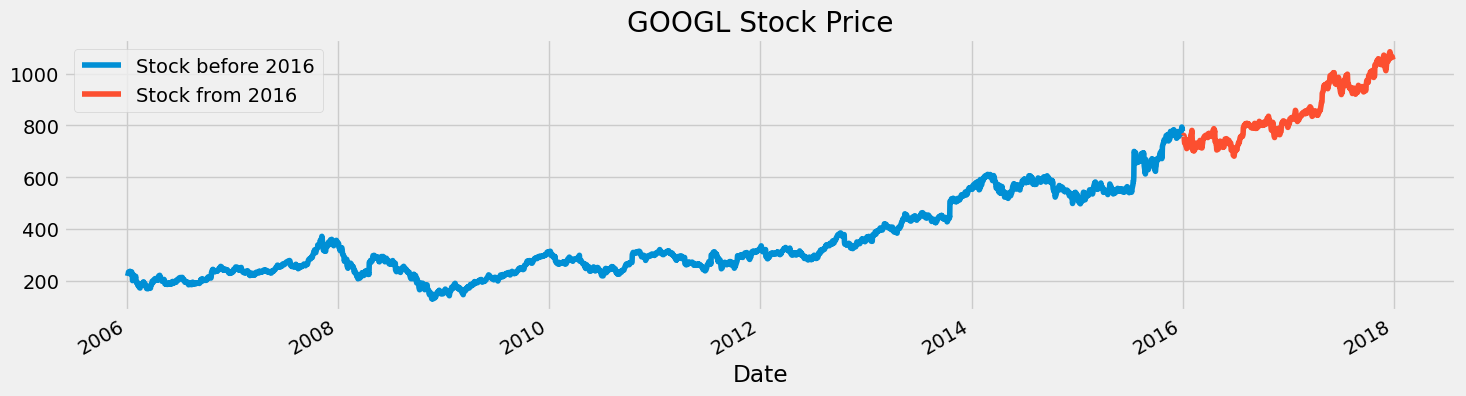

In [7]:
dataset["Close"][:'2015'].plot(figsize=(16,4),legend=True)
dataset["Close"]['2016':].plot(figsize=(16,4),legend=True)
plt.legend(["Stock before 2016","Stock from 2016"])
plt.title("GOOGL Stock Price")
plt.show()

## Scaling Data

In [8]:
# Scaling with minmaxscaller for data train
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
#checking shape of data train
training_set_scaled.shape

(2516, 1)

## Build data for X dan Y
## X choosen by 60 day before

In [10]:
X_train = []
y_train = []
for i in range(60,training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])


X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Modelling

In [55]:
# Sequential Modelling
model = Sequential()

# First LSTM layer with Dropout regularisation
model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout regularisation
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with Dropout regularisation
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer, fill the code below
model.add(LSTM(units=60))
model.add(Dropout(0.2))

# The output layer
model.add(Dense(units=1))

# Compiling
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train fitting for the model
model.fit(X_train, y_train, epochs=25, batch_size=12)

Epoch 1/25
205/205 [==============================] - 13s 38ms/step - loss: 0.0090
Epoch 2/25
205/205 [==============================] - 8s 39ms/step - loss: 0.0040
Epoch 3/25
205/205 [==============================] - 9s 45ms/step - loss: 0.0031
Epoch 4/25
205/205 [==============================] - 9s 44ms/step - loss: 0.0024
Epoch 5/25
205/205 [==============================] - 9s 45ms/step - loss: 0.0022
Epoch 6/25
205/205 [==============================] - 9s 46ms/step - loss: 0.0020
Epoch 7/25
205/205 [==============================] - 9s 46ms/step - loss: 0.0019
Epoch 8/25
205/205 [==============================] - 9s 46ms/step - loss: 0.0017
Epoch 9/25
205/205 [==============================] - 9s 46ms/step - loss: 0.0016
Epoch 10/25
205/205 [==============================] - 9s 46ms/step - loss: 0.0016
Epoch 11/25
205/205 [==============================] - 9s 45ms/step - loss: 0.0015
Epoch 12/25
205/205 [==============================] - 9s 45ms/step - loss: 0.0014
Epoch 13/25


In [56]:
# Prepare for data test similar way for data train
dataset_total = pd.concat((dataset["Close"][:'2015'],dataset["Close"]['2016':]),axis=0)
test = dataset_total[len(dataset_total)-len(test_set) - 60:].values
test = test.reshape(-1,1)


#Transform the inputs
test = sc.transform(test)

In [57]:
#checking data test shape
test.shape

(563, 1)

### Prediction

In [58]:
# Preparing X_test and predicting the prices of the stock's
X_test = []
for i in range(60,test.shape[0]):
    X_test.append(test[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


#Predicting stocks price
predict_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predict_stock_price)

16/16 [==============================] - 1s 17ms/step


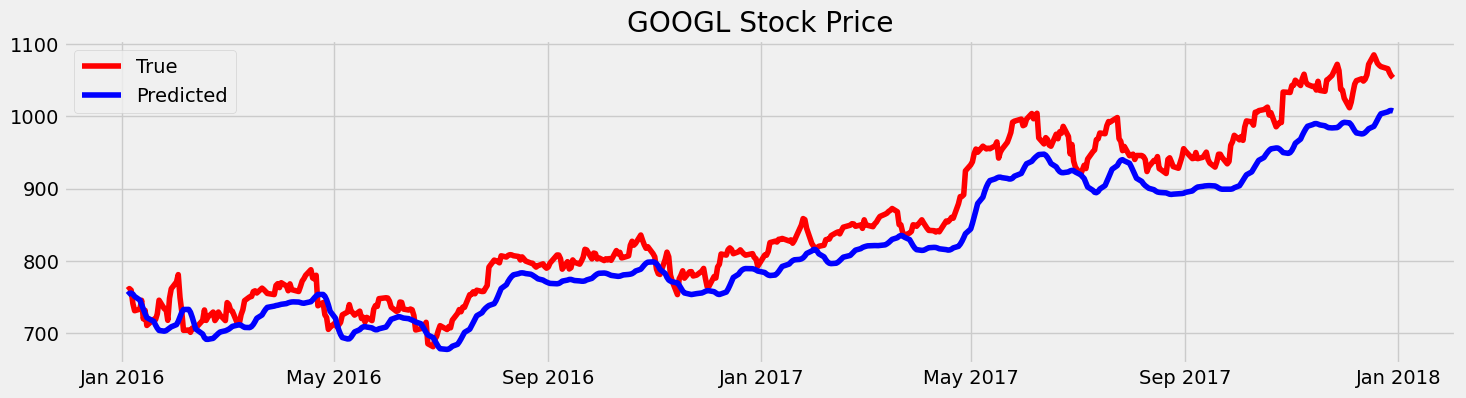

In [59]:
# Visualizing the results for prediction 
dates = dataset.index[-1*test.shape[0]+60:]
prediction_plot(test_set,predicted_stock_price)

In [60]:
# Evaluating our model with RMSE function above
error_eval(test_set,predicted_stock_price)

The error is 4.09%


Setelah data dipisahkan, saatnya data discalling dengan MinMaxSCaller yang bertujuan untuk merubah nilai menjadi skala dari 0 hingga 1. Setelah proses scalling, saatnya proses pemisahan data TRAIN menjadi X_TRAIN, dan Y_TRAIN. X_TRAIN merupakan variabel data yang akan dicompute, dab Y_TRAIN merupakan data yang akan difit. Disini akan digunakan data dengan metode LSTM, dimana LSTM merupakan data yang akan diproses dengan memanfaatkan Nilai-Nilai sebelumnya untuk mendapatkan nilai setelahnya, sehingga disini akan menggunakan FOR 60 untuk melakukan pemrosesan data, data tersebut disimpan untuk melakukan fitting data pada Y_TRAIN. 60 juga dapat diartikan 60 hari sebelumnya. Pada pemrosesan ini akan menggunakan 5 layer, dimana layer pertama sebagai INPUT_LAYER dengan banyak neuron sebanyak 60 yang memiliki nilai kembalian dengan proses DROPOUT, layer kedua dan ketiga berperan sebagai HIDDEN_LAYER dengan banyak neuron sebanyak 60 yang memiliki nilai kembalian dengan proses DROPOUT, layer keempat berperan sebagai HIDDEN_LAYER dengan banyak neuron sebanyak 60 tanpa nilai kembalian, dan layer kelima sebagai OUTPUT_LAYER dengan neuron sebanyak 1 pada tipe dense. optimizer='rmsprop',loss='mean_squared_error', epoch=25 dan batch_size=12, saatnya proses fitting

Saat proses prediksi disini akan terlihat prediksi stock price GOOGL untuk periode 2016 hingga 2017 dengan real stock pricenya juga. Dapat terlihat dari grafik diatas, disini terlihat bahwa garis prediksi ini cukup mendekati data garis true nya, memiliki error bernilai 4.09% ini menunjukan bahwa data ini cukup memiliki deviasi yang rendah bila kita melihat besaran dari stock pricenya itu sendiri